<a href="https://colab.research.google.com/github/syedokun/HAD7001/blob/main/Datathon_1/Datathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Background

#### Dataset description:

The BMI dataset consisted of 23,535 entries and 10 variables known to influence BMI, providing a comprehensive view of Canadian public health. These variables included demographic factors such as age, gender, height, and weight; lifestyle attributes like caloric and sugar intake, physical activity, fast food frequency, and screen time; and health indicators, including Body Mass Index (BMI)

## Import the Library and Dataset into workspace

In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

Saving Datathon1-Dataset2 - HAD7001.csv to Datathon1-Dataset2 - HAD7001 (3).csv


In [ ]:
import pandas as pd


source_df = pd.read_csv('/content/Datathon1-Dataset2 - HAD7001.csv')
source_df

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685
...,...,...,...,...,...,...,...,...,...,...
23530,51,Female,2858,65,37,1,9,1.774514,56.917788,18.075460
23531,20,Female,2573,27,27,1,1,1.677173,57.277270,20.362283
23532,26,Female,2246,37,44,0,3,1.661042,80.314959,29.109537
23533,22,Male,1588,24,101,4,7,1.577156,43.365424,17.433880


## EDA and preprocessing

In [ ]:
source_df.describe()

,Age,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
count,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000
mean,48.532993,2495.845634,64.824559,89.496707,2.018441,5.486127,1.650279,70.019142,26.127641
std,17.872736,577.798752,32.004657,52.120810,1.414634,3.454036,0.119714,15.016866,6.875510
min,18.000000,1500.000000,10.000000,0.000000,0.000000,0.000000,1.196086,10.010016,3.442184
25%,33.000000,1991.000000,37.000000,45.000000,1.000000,2.000000,1.569815,59.859242,21.337576
50%,48.000000,2495.000000,65.000000,90.000000,2.000000,6.000000,1.650122,70.022501,25.661507
75%,64.000000,2994.000000,93.000000,135.000000,3.000000,8.000000,1.731470,80.038009,30.329032
max,79.000000,3499.000000,119.000000,179.000000,4.000000,11.000000,2.154243,126.493504,70.475419


- No missing or constant values were identified.
- All values fell within expected ranges (the age variable ranged from 18 to 80)
- No data cleaning was required for this dataset

In [ ]:
categorical_cols = source_df.select_dtypes(exclude=['number']).columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Unique values: {source_df[col].unique()}")
    print(f"Value counts:\n{source_df[col].value_counts()}")
    print("-" * 20)

Column: Gender
Unique values: ['Female' 'Male']
Value counts:
Gender
Female    14896
Male       8639
Name: count, dtype: int64
--------------------



> There is a class imbalance between Male and Female data points. Female datapoints are almost double that of Male.



In [ ]:
missing_values = source_df.isnull().sum()

print("Missing Values:")
print(missing_values)

Missing Values:
Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
dtype: int64


### BMI Categorization
1. Underweight where BMI < 18.5
2. Normal where 18.5 <= BMI <= 24.9
3. Overweight where 24.9<= BMI <= 29.9
4. Obese where BMI > 29.9

In [ ]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal'
    elif 24.9 <= bmi <= 29.9:
        return 'Overweight'
    else:
        return 'obesity'

source_df['BMI_Category'] = source_df['BMI'].apply(categorize_bmi)

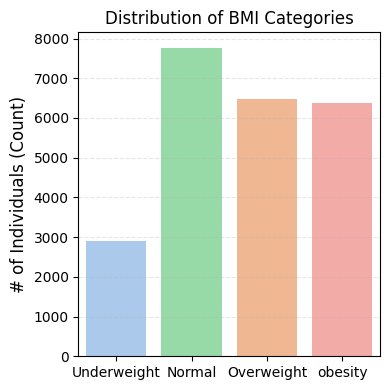

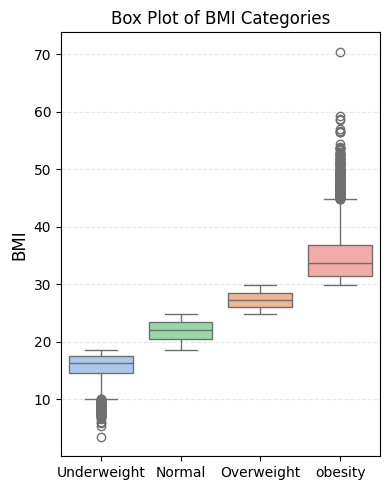

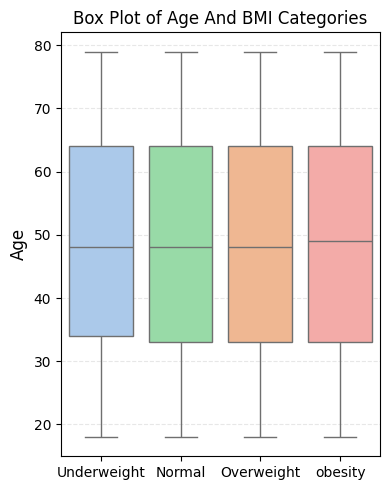

<ipython-input-54-0f132a358540>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_c.index, y=gender_c.values, palette={'Male': c[6], 'Female': c[8]})


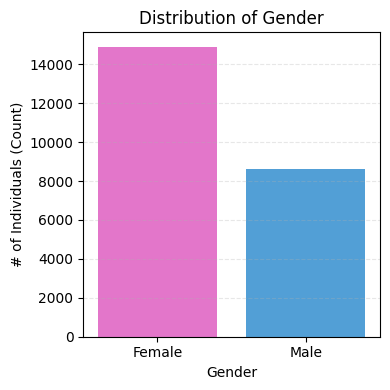

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

c = sns.color_palette("pastel")
bmi_cat_colour = {
    'Underweight': c[0],
    'Normal': c[2],
    'Overweight': c[1],
    'obesity': c[3],
}
category_order = list(bmi_cat_colour.keys())

def plot_bmi_distribution(source_df, category_colors, category_order):
    plt.figure(figsize=(4, 4))
    value_counts = source_df['BMI_Category'].value_counts()
    counts = [value_counts.get(cat, 0) for cat in category_order]
    sns.barplot(x=category_order,y=counts, hue=category_order, palette=category_colors, dodge=False)
    plt.title('Distribution of BMI Categories', fontsize=12)
    plt.ylabel('# of Individuals (Count)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_bmi_boxplot(source_df, category_colors, category_order):
    plt.figure(figsize=(4,5))
    sns.boxplot(x='BMI_Category', y='BMI',  data=source_df, hue='BMI_Category',  palette=category_colors, order=category_order, dodge=False)
    plt.title('Box Plot of BMI Categories', fontsize=12)
    plt.ylabel('BMI', fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_age_bmi_boxplot(source_df, category_colors, category_order):
    plt.figure(figsize=(4,5))
    sns.boxplot(x='BMI_Category', y='Age',  data=source_df, hue='BMI_Category',  palette=category_colors, order=category_order, dodge=False)
    plt.title('Box Plot of Age And BMI Categories', fontsize=12)
    plt.ylabel('Age', fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_gender_distribution(source_df):
    c = sns.color_palette("husl", 9)

    gender_c = source_df['Gender'].value_counts()
    plt.figure(figsize=(4, 4))
    sns.barplot(x=gender_c.index, y=gender_c.values, palette={'Male': c[6], 'Female': c[8]})
    plt.title('Distribution of Gender')
    plt.xlabel('Gender')
    plt.ylabel('# of Individuals (Count)')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_bmi_distribution(source_df, bmi_cat_colour, category_order)
plot_bmi_boxplot(source_df, bmi_cat_colour, category_order)
plot_age_bmi_boxplot(source_df, bmi_cat_colour, category_order)
plot_gender_distribution(source_df)

In [ ]:
source_df['BMI_Category'].value_counts()

,count
BMI_Category,
Normal,7768
Overweight,6488
obesity,6366
Underweight,2913



>  Observed imbalance in Target Distribution, especially in the Underweight Category




In [ ]:
def check_outliers(source_df, bmi_cat):
    c_df = source_df[source_df['BMI_Category'] == bmi_cat ]['BMI']
    Q1 , Q3 = c_df.quantile(0.25), c_df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound , upper_bound = Q1 - 1.5 * IQR , Q3 + 1.5 * IQR
    outliers = c_df[(c_df < lower_bound) | (c_df > upper_bound)]
    num_outliers = len(outliers)
    print("Outliers in the {} category {} samples".format(bmi_cat, num_outliers))
check_outliers(source_df, 'Underweight')
check_outliers(source_df, 'obesity')

Outliers in the Underweight category 83 samples
Outliers in the obesity category 227 samples


## Fitting the KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
le = LabelEncoder()
source_df['Gender'] = le.fit_transform(source_df['Gender'])

In [ ]:
X = source_df[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight']]
y = source_df['BMI_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Traing size", X_train.shape)
print("Testing size", X_test.shape)

Traing size (18828, 9)
Testing size (4707, 9)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classes = source_df['BMI_Category'].unique()

In [ ]:
y_train.value_counts()

,count
BMI_Category,
Normal,6238
Overweight,5186
obesity,5104
Underweight,2300


## Building the KNN Model

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

knn_trial = KNeighborsClassifier(n_neighbors=5)
knn_trial.fit(X_train, y_train)


y_pred_trial = knn_trial.predict(X_test)
print(confusion_matrix(y_test, y_pred_trial, labels=classes ) )

report_trial = classification_report(y_test, y_pred_trial, labels=classes)
print(report_trial)

[[1025  233    4    0]
 [  81  959  262    0]
 [   1  208 1296   25]
 [   0    2  225  386]]
              precision    recall  f1-score   support

     obesity       0.93      0.81      0.87      1262
  Overweight       0.68      0.74      0.71      1302
      Normal       0.73      0.85      0.78      1530
 Underweight       0.94      0.63      0.75       613

    accuracy                           0.78      4707
   macro avg       0.82      0.76      0.78      4707
weighted avg       0.80      0.78      0.78      4707



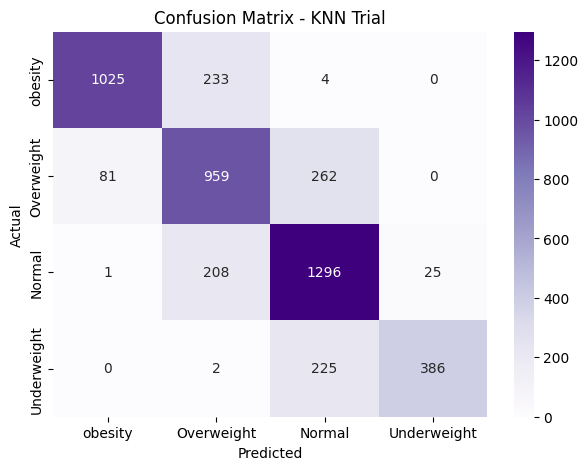

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred_trial, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Trial')
plt.show()

## Optimal K testing

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2]
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

(best_params, best_score)

({'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'},
 0.7952511145011034)

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)

knn = KNeighborsClassifier(metric='minkowski', p=1, n_neighbors=11, weights = 'distance')
knn.fit(X_train, y_train)

classes = source_df['BMI_Category'].unique()

y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred, labels=classes ) )

report = classification_report(y_test, y_pred, labels=classes)
print(report)

[[1055  203    4    0]
 [  93 1024  185    0]
 [   2  169 1347   12]
 [   0    2  249  362]]
              precision    recall  f1-score   support

     obesity       0.92      0.84      0.87      1262
  Overweight       0.73      0.79      0.76      1302
      Normal       0.75      0.88      0.81      1530
 Underweight       0.97      0.59      0.73       613

    accuracy                           0.80      4707
   macro avg       0.84      0.77      0.79      4707
weighted avg       0.82      0.80      0.80      4707



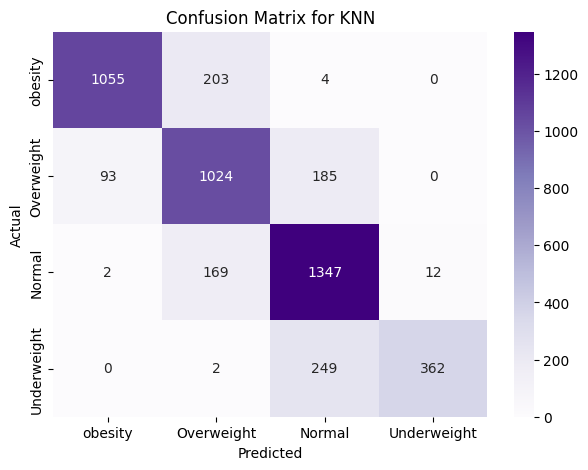

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

## Feature correlation analysis

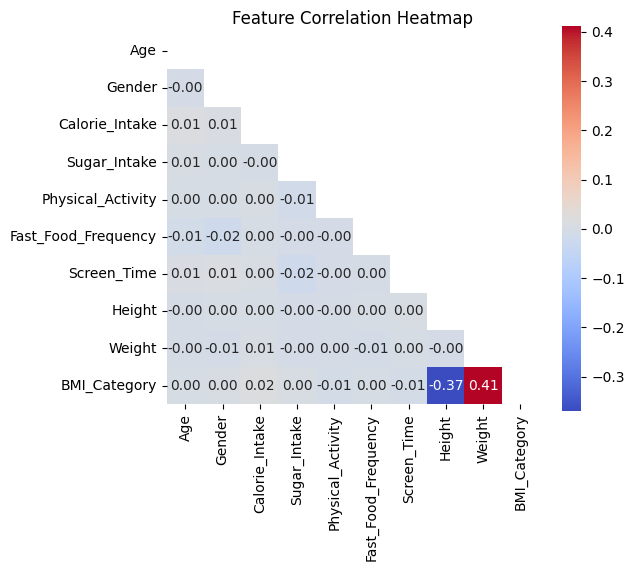

In [ ]:
vis_df = pd.DataFrame(X_train, columns = X.columns)
vis_df['BMI_Category']= y_train.values


label_encoder = LabelEncoder()
vis_df['BMI_Category'] = label_encoder.fit_transform(vis_df['BMI_Category'])

corr_mtx = vis_df.corr()
mask = np.triu(np.ones_like(corr_mtx, dtype=bool))

plt.figure(figsize=(6,5))
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

- Height and weight have the strong correlation with the target variable (BMI_Category)


> ## Feature Inspection

1.   Ablation study - Fitting KNN model
2.   Fitting KNN discarding Height and Weight
3.   Ablation study after removing Height and Weight

## 1. Ablation study - Fitting KNN model


In [ ]:
from sklearn.metrics import accuracy_score

feature_columns = ['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight']
result = {}

In [ ]:
f1_result = {cls: [] for cls in ['Normal', 'Overweight', 'Underweight', 'obesity']}

for i in range(len(feature_columns)):
    temp_feature_columns = feature_columns[:i] + feature_columns[i+1:]
    print("Feature columns used:")
    print(temp_feature_columns)
    print("-" * 20)

    X = source_df[temp_feature_columns]
    y = source_df['BMI_Category']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier(metric='minkowski', p=1, n_neighbors=11, weights = 'distance')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    cls_rep = classification_report(y_test, y_pred, output_dict=True)

    for cls in f1_result.keys():
        f1_result[cls].append(cls_rep.get(cls, {}).get('f1-score', 0))
    result[feature_columns[i]] = {'acc': accuracy_score(y_test, y_pred), 'f1': f1_result}

    print(f"Ablation study removing column: {feature_columns[i]}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 20)
    print("-" * 20)

Feature columns used:
['Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight']
--------------------
Ablation study removing column: Age
[[1368  149   12    1]
 [ 154 1066    0   82]
 [ 213    2  398    0]
 [   0  183    0 1079]]
              precision    recall  f1-score   support

      Normal       0.79      0.89      0.84      1530
  Overweight       0.76      0.82      0.79      1302
 Underweight       0.97      0.65      0.78       613
     obesity       0.93      0.85      0.89      1262

    accuracy                           0.83      4707
   macro avg       0.86      0.80      0.82      4707
weighted avg       0.84      0.83      0.83      4707

--------------------
--------------------
Feature columns used:
['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight']
--------------------
Ablation study removing column: Gender
[[1381  137    9    3]
 

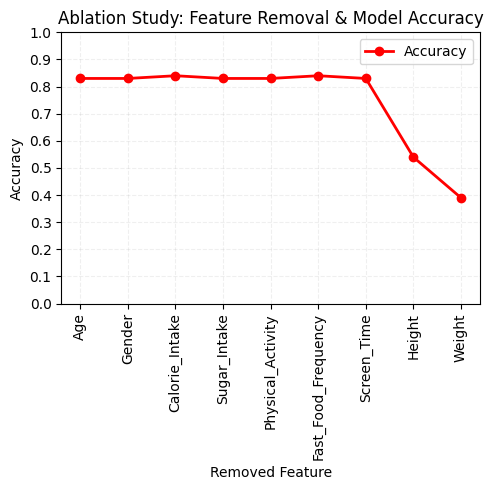

In [ ]:
features = list(result.keys())
res_acc = [np.round(result[feature]['acc'],2) for feature in features]
plt.figure(figsize=(5, 5))
plt.plot(features, res_acc, marker='o', color='red', label="Accuracy", linewidth=2)
plt.title("Ablation Study: Feature Removal & Model Accuracy")
plt.xlabel("Removed Feature")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.2)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.legend()
plt.tight_layout()
plt.show()

- Height and weight predictably have the highest effects on the prediction.

## 2. Fitting the KNN discarding Height and Weight





In [ ]:
X = source_df[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']]
y = source_df['BMI_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(metric='minkowski', p=1, n_neighbors=11, weights = 'distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[621 435  60 414]
 [558 362  43 339]
 [257 183  22 151]
 [536 328  43 355]]
              precision    recall  f1-score   support

      Normal       0.31      0.41      0.35      1530
  Overweight       0.28      0.28      0.28      1302
 Underweight       0.13      0.04      0.06       613
     obesity       0.28      0.28      0.28      1262

    accuracy                           0.29      4707
   macro avg       0.25      0.25      0.24      4707
weighted avg       0.27      0.29      0.27      4707



## 3. Ablation study removing Height and Weight

In [ ]:
feature_columns = ['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']

result = {}

In [ ]:
for i in range(len(feature_columns)):
    temp_feature_columns = feature_columns[:i] + feature_columns[i+1:]
    print("Feature columns used:")
    print(temp_feature_columns)
    print("-" * 20)

    X = source_df[temp_feature_columns]
    y = source_df['BMI_Category']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier(metric='minkowski', p=1, n_neighbors=11, weights = 'distance')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    cls_rep = classification_report(y_test, y_pred, output_dict=True)

    result[feature_columns[i]] = {'acc': accuracy_score(y_test, y_pred)}

    print(f"Ablation study removing column: {feature_columns[i]}")
    print(confusion_matrix(y_test, y_pred))
    print( classification_report(y_test, y_pred))
    print("-" * 20)
    print("-" * 20)

Feature columns used:
['Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']
--------------------
Ablation study removing column: Age
[[638 450  69 373]
 [553 349  53 347]
 [251 184  20 158]
 [546 328  56 332]]
              precision    recall  f1-score   support

      Normal       0.32      0.42      0.36      1530
  Overweight       0.27      0.27      0.27      1302
 Underweight       0.10      0.03      0.05       613
     obesity       0.27      0.26      0.27      1262

    accuracy                           0.28      4707
   macro avg       0.24      0.25      0.24      4707
weighted avg       0.26      0.28      0.27      4707

--------------------
--------------------
Feature columns used:
['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']
--------------------
Ablation study removing column: Gender
[[647 427  56 400]
 [547 347  47 361]
 [257 164  18 174]
 [501 347  43 371]]
   

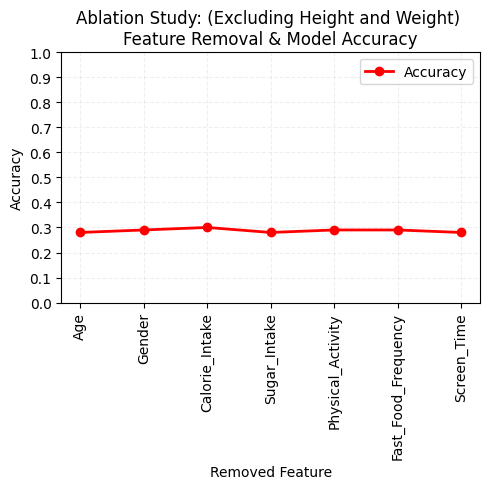

In [ ]:
features = list(result.keys())
res_acc = [np.round(result[feature]['acc'],2) for feature in features]
plt.figure(figsize=(5, 5))
plt.plot(features, res_acc, marker='o', color='red', label="Accuracy", linewidth=2)
plt.title("Ablation Study: (Excluding Height and Weight) \nFeature Removal & Model Accuracy")
plt.xlabel("Removed Feature")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.2)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

Without weight and height, the model's accuracy ranges between 28% and 30% across the remaining features.